# Exploratory Analysis (SUV purchase Use Case)

#### 1. Initial Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#### 2. Load data
Load Pandas DataFrame from CSV file

In [2]:
suv_data = pd.read_csv('suv.csv')

#### 3. Initial data exploration

Use DataFrame info method to see column names, data types and null value counts:

In [3]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Use DataFrame head method to see first 10 rows of DataFrame:

In [4]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Use DataFrame describe method to see descriptive statistical values for numeric columns:

In [5]:
suv_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


#### 4. Data exploration with visualisations

Imports for visualisation:

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

Create visualisation for each variable:
 - For qualitative variables (columns): plot count of each possible value - use seaborn countplot function
 - For quantitative variables (columns): plot histogram - use DataFrame plot.hist method

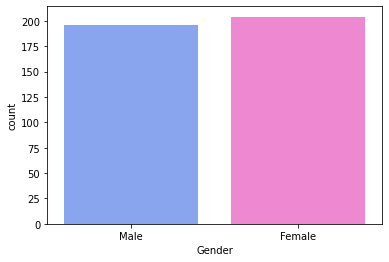

In [7]:
# Gender (qualitative)
sns.countplot(x='Gender', data=suv_data, 
              palette=['#789DFF',"#FF78D8"])
plt.show()

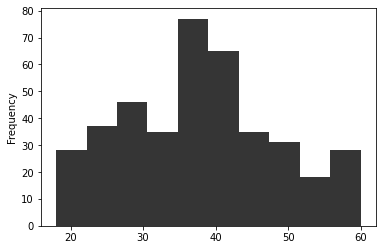

In [8]:
# Age (quantitative)
suv_data['Age'].plot.hist(bins=10, color='#353535')
plt.show()

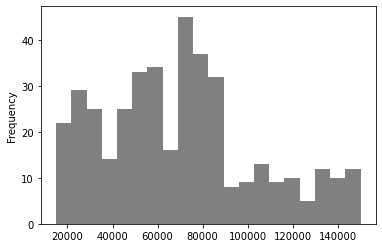

In [9]:
# EstimatedSalary (quantitative)
suv_data['EstimatedSalary'].plot.hist(bins=20, color="grey")
plt.show()

<AxesSubplot:xlabel='Purchased', ylabel='count'>

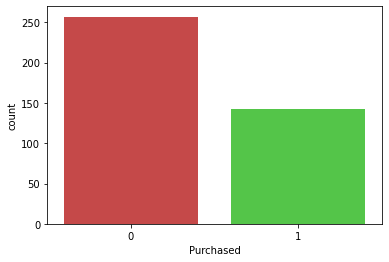

In [10]:
# Purchased (qualitative)
sns.countplot(x='Purchased', data=suv_data, 
              palette=['#DA3434','#43DA34'])

#### 5. Dependent and independent variables

At this point, I choose 'Age', 'Gender' and 'EstimatedSalary' as the *independent variables*; and to set 'Purchased' as the *dependent variable*.

This means that the decision tree will try to predict whether a client will purchase an SUV car (1) or not (0) depending on the clients age, gender and salary; or a subset of these.

#### 6. Check for correlations between the independent variables and the dependent variable

##### 6.1. Correlation between Gender and Purchase variables:

Plot chart with number of males who purchased/did not purchase an SUV, and number of females who purchased/did not purchase an SUV - using seaborn countplot function.

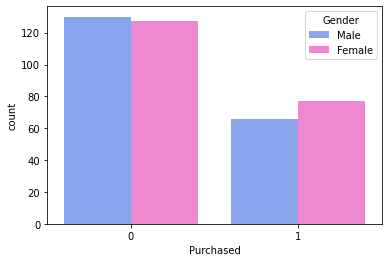

In [11]:
sns.countplot(x='Purchased', hue='Gender', data=suv_data, 
              palette=['#789DFF',"#FF78D8"])
plt.show()

There are slightly less females within the non-buyers, whereas there are slightly more females within the buyers. Thus, being a female slightly increases the probability of the client purchasing a SUV.

##### 6.2. Correlation between Age and Purchase variables:

In order to plot the correlation, firstly I group the age variable in intervals, creating a new "AgeGroup" column in the DataFrame. In order to create the intervals, I use the previously generated age histogram chart as a refference.

In [12]:
def apply_age_group(age):
    if age < 18:
        return '<18'
    elif age <= 30:
        return '18-30'
    elif age <= 40:
        return '31-40'
    elif age <= 50:
        return '40-50'
    else:
        return '>50'

suv_data['AgeGroup'] = suv_data['Age'].apply(apply_age_group)

suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeGroup
0,15624510,Male,19,19000,0,18-30
1,15810944,Male,35,20000,0,31-40
2,15668575,Female,26,43000,0,18-30
3,15603246,Female,27,57000,0,18-30
4,15804002,Male,19,76000,0,18-30


Plot chart with count of all combinations of the Purchase variable and the AgeGroup variable - using seaborn countplot function.

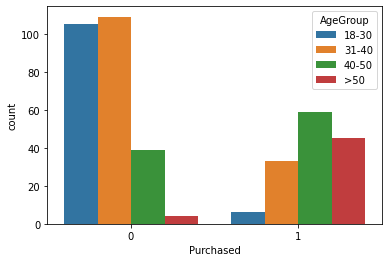

In [13]:
sns.countplot(x='Purchased', hue='AgeGroup', data=suv_data)
plt.show()

Clear pattern here: as client's age increases, the probability of them buying an SUV increases sharply.

##### 6.3. Correlation between EstimatedSalary and Purchase variables:

In order to plot the correlation, firstly I group the EstimatedSalary variable in intervals, creating a new "SalaryGroup" column in the DataFrame. In order to create the intervals, I use the previously generated salary histogram chart as a refference.

In [14]:
def apply_salary_group(salary):
    if salary < 30000:
        return '<30k'
    elif salary <= 60000:
        return '30-60k'
    elif salary <= 90000:
        return '60-90k'
    elif salary <= 115000:
        return '90-115k'
    else:
        return '>115k'

suv_data['SalaryGroup'] = suv_data['EstimatedSalary'].apply(apply_salary_group)
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,AgeGroup,SalaryGroup
0,15624510,Male,19,19000,0,18-30,<30k
1,15810944,Male,35,20000,0,31-40,<30k
2,15668575,Female,26,43000,0,18-30,30-60k
3,15603246,Female,27,57000,0,18-30,30-60k
4,15804002,Male,19,76000,0,18-30,60-90k


Plot chart with count of all combinations of the Purchase variable and the SalaryGroup variable - using seaborn countplot function.

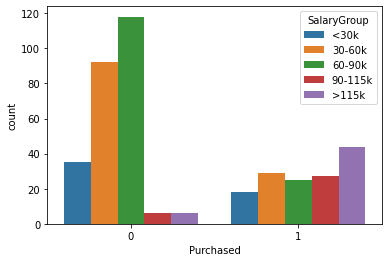

In [15]:
sns.countplot(x='Purchased', data=suv_data, hue='SalaryGroup',
              hue_order=['<30k', '30-60k', '60-90k', '90-115k', '>115k'])
plt.show()

##### 6.4. Purchased (dependent) variable by Age and EstimatedSalary:

By now it looks like "Age" and "EstimatedSalary" are the 2 independent variables that have the biggest impact in the dependent variable ("Purchased").

Therefore, I generate a scatter plot to visualise each entry as a point in a 2-dimensional space in which the X value represents "EstimatedSalary" and the Y value represents "Age", whereas the color of each point indicates the "Purchase" value: either 0 (red) or 1 (green).

It can be seen clearly that these 2 variables delimit an area in which there are mostly "0" red values, and an area where there are mostly "1" green values. This means that a properly trained regression algorithm must be able to classify these entries quite accurately, even a simple decision tree with 3 or 4 leaf nodes.

There are no apparent non-linearities, so a logistic regression might work well.

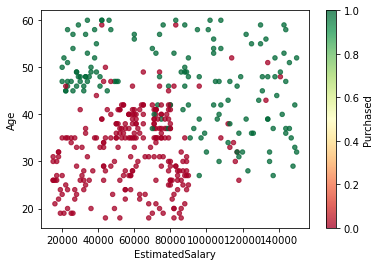

In [16]:
suv_data.plot.scatter(x='EstimatedSalary', y='Age', c='Purchased', colormap='RdYlGn', alpha=0.75, sharex=False)
plt.show()